In [11]:
import os
import pandas as pd

directory = 'data/'

# Dictionary to hold DataFrames
dataframes = {}

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Create a DataFrame name by replacing 'decklists' with 'df' in the filename
        df_name = filename.replace('decklists', 'df').replace('.csv', '')

        try:
            # Read the CSV file into a DataFrame
            df = pd.read_csv(os.path.join(directory, filename))
            # Store the DataFrame in the dictionary
            dataframes[df_name] = df
        except pd.errors.ParserError as e:
            print(f"Error parsing {filename}: {e}")
        except Exception as e:
            print(f"An error occurred with {filename}: {e}")
            
    
#access indivdual dfs like that:
#df_atraxa = dataframes.get('df_atraxa')

print(dataframes.get('df_atraxa').head())

   Deck Number          Commander Name  Price                           Tag  \
0            0  Atraxa, Praetors Voice   4283             ['Planeswalkers']   
1            1  Atraxa, Praetors Voice    650      ['Phyrexians', 'Infect']   
2            2  Atraxa, Praetors Voice   1564            ['+1/+1 Counters']   
3            3  Atraxa, Praetors Voice    375  ['Control', 'Planeswalkers']   
4            4  Atraxa, Praetors Voice    329                    ['Infect']   

         Date                   Card 1                    Card 2  \
0  2024-11-18  Atraxa, Praetors' Voice           Ajani Steadfast   
1  2024-11-18  Atraxa, Praetors' Voice      Ajani, Sleeper Agent   
2  2024-11-18  Atraxa, Praetors' Voice  Anduril, Narsil Reforged   
3  2024-11-18  Atraxa, Praetors' Voice            Adarkar Wastes   
4  2024-11-18  Atraxa, Praetors' Voice      Agent Frank Horrigan   

                      Card 3              Card 4                 Card 5  ...  \
0  An Offer You Can't Refuse       A

In [12]:
for df_name, df in dataframes.items():
    # Check for duplicate rows
    duplicates = df[df.duplicated()]
    
    
    if not duplicates.empty:
        print(f"Duplicate rows found in {df_name}:")
        print(duplicates)
    else:
        print(f"No duplicate rows found in {df_name}")
        


No duplicate rows found in df_aegar
No duplicate rows found in df_atraxa
No duplicate rows found in df_bria
No duplicate rows found in df_firkraag
No duplicate rows found in df_ghyrson
No duplicate rows found in df_jhoiraWC
No duplicate rows found in df_neera
No duplicate rows found in df_river_song
No duplicate rows found in df_veyran
No duplicate rows found in df_yusri


In [13]:
for df_name, df in dataframes.items():
    # Fill NaN values with [BasicLand]
    dataframes[df_name] = df.fillna('[BasicLand]')
    
print(dataframes.get('df_atraxa').head())

   Deck Number          Commander Name  Price                           Tag  \
0            0  Atraxa, Praetors Voice   4283             ['Planeswalkers']   
1            1  Atraxa, Praetors Voice    650      ['Phyrexians', 'Infect']   
2            2  Atraxa, Praetors Voice   1564            ['+1/+1 Counters']   
3            3  Atraxa, Praetors Voice    375  ['Control', 'Planeswalkers']   
4            4  Atraxa, Praetors Voice    329                    ['Infect']   

         Date                   Card 1                    Card 2  \
0  2024-11-18  Atraxa, Praetors' Voice           Ajani Steadfast   
1  2024-11-18  Atraxa, Praetors' Voice      Ajani, Sleeper Agent   
2  2024-11-18  Atraxa, Praetors' Voice  Anduril, Narsil Reforged   
3  2024-11-18  Atraxa, Praetors' Voice            Adarkar Wastes   
4  2024-11-18  Atraxa, Praetors' Voice      Agent Frank Horrigan   

                      Card 3              Card 4                 Card 5  ...  \
0  An Offer You Can't Refuse       A

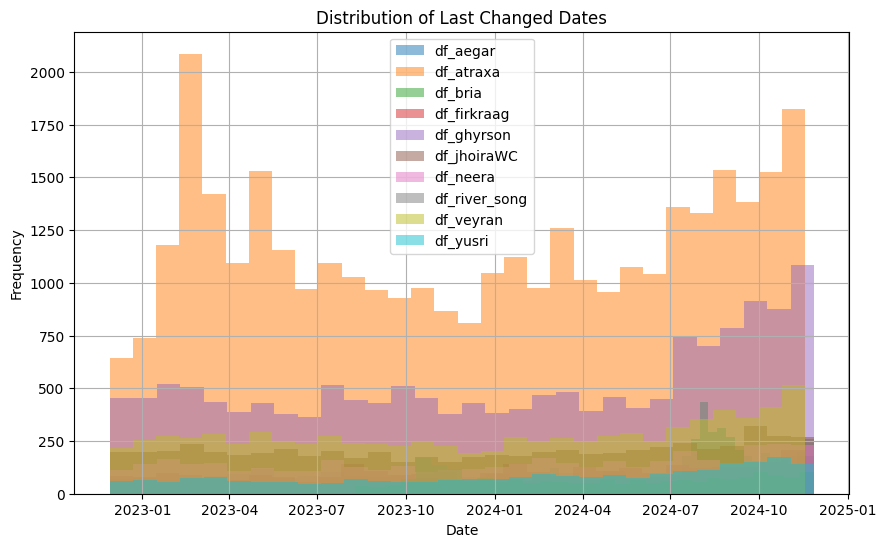

In [14]:
import matplotlib.pyplot as plt

# List to hold all date values
all_dates = []

for df_name, df in dataframes.items():
    if 'Date' in df.columns:
        # Append the 'Date' column values and DataFrame name to the list
        dates = df['Date'].dropna().tolist()
        all_dates.extend([(date, df_name) for date in dates])

# Convert the list of dates to a pandas DataFrame
date_df = pd.DataFrame(all_dates, columns=['Date', 'DataFrame'])

# Convert the date values to datetime format
date_df['Date'] = pd.to_datetime(date_df['Date'], errors='coerce')

# Drop NaT values that couldn't be converted
date_df = date_df.dropna()

# Plot the distribution of the dates
plt.figure(figsize=(10, 6))

# Create a histogram for each DataFrame
for df_name in date_df['DataFrame'].unique():
    subset = date_df[date_df['DataFrame'] == df_name]
    plt.hist(subset['Date'], bins=30, alpha=0.5, label=df_name)

plt.title('Distribution of Last Changed Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Initialize a dictionary to store the unique values count for each DataFrame
unique_values = {}
mean_values = {}

for df_name, df in dataframes.items():
    # Select only the columns from 'Card 1' to 'Card 100'
    selected_columns = df.loc[:, 'Card 1':'Card 100']
    
    # Calculate the mean value for each row excluding the '[BasicLand]' entries
    mean_values[df_name] = selected_columns.apply(lambda row: row[row != '[BasicLand]'].count(), axis=1).mean()
    
    # Concatenate the selected columns into a single Series
    concatenated_series = pd.concat([selected_columns[col] for col in selected_columns.columns], ignore_index=True)
    
    # Remove '[BasicLand]' entries
    cleaned_series = concatenated_series[concatenated_series != '[BasicLand]']
    
    # Count the number of unique values in the cleaned Series
    unique_count = cleaned_series.nunique()
    
    # Store the results in the dictionary
    unique_values[df_name] = unique_count
    
    # Print the results
    print(f"\nDataFrame: {df_name}")
    print(f"Unique cards count: {unique_count}")
    print(f"Mean count of non-[BasicLand] cards: {mean_values[df_name]}\n")



DataFrame: df_aegar
Unique cards count: 4680
Mean count of non-[BasicLand] cards: 76.77241126966703

DataFrame: df_atraxa
Unique cards count: 14604
Mean count of non-[BasicLand] cards: 87.67632241813602

DataFrame: df_bria
Unique cards count: 4873
Mean count of non-[BasicLand] cards: 78.48736196319018

DataFrame: df_firkraag
Unique cards count: 3556
Mean count of non-[BasicLand] cards: 78.44572158365261

DataFrame: df_ghyrson
Unique cards count: 5877
Mean count of non-[BasicLand] cards: 78.50124704227153

DataFrame: df_jhoiraWC
Unique cards count: 5091
Mean count of non-[BasicLand] cards: 82.92787365678932

DataFrame: df_neera
Unique cards count: 5922
Mean count of non-[BasicLand] cards: 77.39423076923077

DataFrame: df_river_song
Unique cards count: 4536
Mean count of non-[BasicLand] cards: 80.6982276119403

DataFrame: df_veyran
Unique cards count: 4655
Mean count of non-[BasicLand] cards: 79.92558028236421


DataFrame: df_yusri
Unique cards count: 4654
Mean count of non-[BasicLand] 